In [2]:
import pandas as pd


DATA_SOURCE_PATH = 'mock.csv'

df = pd.read_csv(DATA_SOURCE_PATH)
df.head()

,download,upload,date
0,12.47,6.47,2022-07-06 17:55:44.743254
1,13.34,6.81,2022-07-06 17:58:45.046146
2,15.91,7.22,2022-07-06 17:59:48.943157
3,14.10,7.18,2022-07-06 18:00:49.385292
4,11.95,6.25,2022-07-06 18:01:44.345845


In [3]:
df.describe()

,download,upload
count,8565.000000,8565.000000
mean,23.940957,6.815101
std,70.160011,0.802993
min,1.000000,1.380000
25%,11.690000,6.770000
50%,17.000000,7.120000
75%,22.020000,7.260000
max,1014.820000,12.190000


In [31]:
# filter data bigger than 100

# Considering the overall average of the download speed, it's extremely unlikely that a user will have a download speed bigger than 100 MB/s.
outliers = df[df['download'] > 50]

print(f'There are {len(outliers)} outliers')

# remove outliers from df
clean_df = df[df['download'] < 50].sort_values(by='download')

There are 120 outliers


In [32]:
clean_df.describe()

,download,upload
count,8445.000000,8445.000000
mean,16.492744,6.830407
std,7.339739,0.773229
min,1.000000,1.380000
25%,11.570000,6.780000
50%,16.860000,7.120000
75%,21.770000,7.260000
max,40.990000,12.190000


Overall Average: 16.53mb

In [55]:
from dateutil import parser

str(parser.parse(clean_df['date'][0]).date())

# pd.to_datetime(clean_df['date'][0]).day_name()

# add day and hour label to facilitate grouping
clean_df['day'] = clean_df['date'].apply(lambda d: parser.parse(d).day)
clean_df['day_name'] = clean_df['date'].apply(lambda d: pd.to_datetime(d).day_name())
clean_df['hour'] = clean_df['date'].apply(lambda d: parser.parse(d).hour)
clean_df['short_date'] = clean_df['date'].apply(lambda d: d[5:11])
clean_df.sort_values('date', inplace=True)
clean_df.head()


,download,upload,date,day,hour,day_name,short_date
0,12.47,6.47,2022-07-06 17:55:44.743254,6,17,Wednesday,07-06
1,13.34,6.81,2022-07-06 17:58:45.046146,6,17,Wednesday,07-06
2,15.91,7.22,2022-07-06 17:59:48.943157,6,17,Wednesday,07-06
3,14.10,7.18,2022-07-06 18:00:49.385292,6,18,Wednesday,07-06
4,11.95,6.25,2022-07-06 18:01:44.345845,6,18,Wednesday,07-06


<AxesSubplot:xlabel='short_date', ylabel='download'>

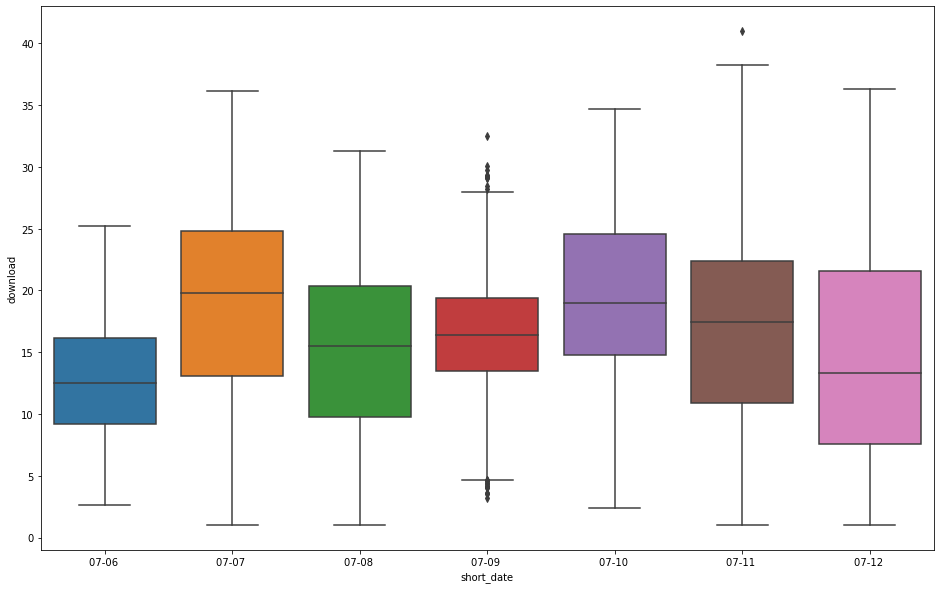

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.boxplot(x='short_date', y='download', data=clean_df)

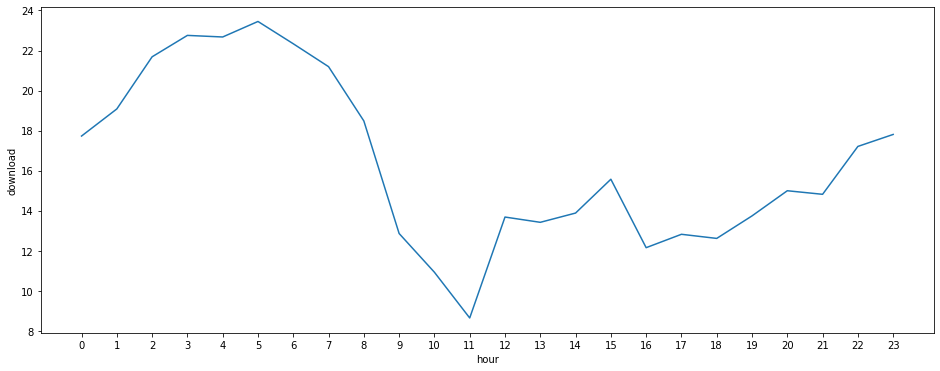

In [74]:
plt.figure(figsize=(16,6))
group_by_hour = clean_df.groupby('hour').mean()
ax = sns.lineplot(x='hour', y='download', data=group_by_hour)
ax.set_xticks(range(len(group_by_hour)), labels=range(0, 24))

media de cada horario do dia (lineplot?)
ontem
overall average
overall graph (grouped average by hour)
boxplot (average by day)




<AxesSubplot:>

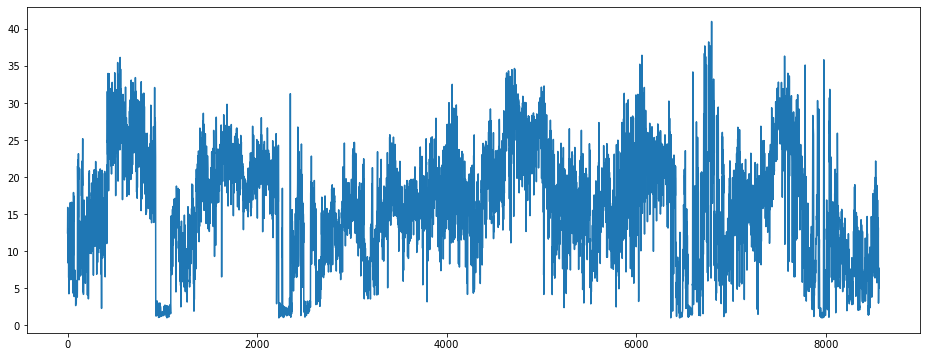

In [81]:
plt.figure(figsize=(16,6))
clean_df['download'].plot()

In [ ]:
/